In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 33.5 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
%matplotlib inline
import dgl
import numpy as np
import scipy.sparse as sp
# Creating from networkx graph
import networkx as nx
import scipy.io
import urllib.request
import dgl
import numpy as np
import scipy.sparse as sp
# Creating from networkx graph
import networkx as nx
import scipy.io
import urllib.request
import torch
import re

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


In [ ]:
import requests
URL = "https://pld.ttu.ee/~maksim/benchmarks/iscas85/bench/c432.bench"
r = requests.get(URL)
print(r.content)


b'# c432\r\n# 36 inputs\r\n# 7 outputs\r\n# 40 inverters\r\n# 120 gates ( 4 ANDs + 119 NANDs + 19 NORs + 18 XORs )\r\n\r\nINPUT(1)\r\nINPUT(4)\r\nINPUT(8)\r\nINPUT(11)\r\nINPUT(14)\r\nINPUT(17)\r\nINPUT(21)\r\nINPUT(24)\r\nINPUT(27)\r\nINPUT(30)\r\nINPUT(34)\r\nINPUT(37)\r\nINPUT(40)\r\nINPUT(43)\r\nINPUT(47)\r\nINPUT(50)\r\nINPUT(53)\r\nINPUT(56)\r\nINPUT(60)\r\nINPUT(63)\r\nINPUT(66)\r\nINPUT(69)\r\nINPUT(73)\r\nINPUT(76)\r\nINPUT(79)\r\nINPUT(82)\r\nINPUT(86)\r\nINPUT(89)\r\nINPUT(92)\r\nINPUT(95)\r\nINPUT(99)\r\nINPUT(102)\r\nINPUT(105)\r\nINPUT(108)\r\nINPUT(112)\r\nINPUT(115)\r\n\r\nOUTPUT(223)\r\nOUTPUT(329)\r\nOUTPUT(370)\r\nOUTPUT(421)\r\nOUTPUT(430)\r\nOUTPUT(431)\r\nOUTPUT(432)\r\n\r\n118 = NOT(1)\r\n119 = NOT(4)\r\n122 = NOT(11)\r\n123 = NOT(17)\r\n126 = NOT(24)\r\n127 = NOT(30)\r\n130 = NOT(37)\r\n131 = NOT(43)\r\n134 = NOT(50)\r\n135 = NOT(56)\r\n138 = NOT(63)\r\n139 = NOT(69)\r\n142 = NOT(76)\r\n143 = NOT(82)\r\n146 = NOT(89)\r\n147 = NOT(95)\r\n150 = NOT(102)\r\n151 = N

In [ ]:
Str="n118 = NOT(1)\r\n119 = NOT(4)\r\n122 = NOT(11)\r\n123 = NOT(17)\r\n126 = NOT(24)\r\n127 = NOT(30)\r\n130 = NOT(37)\r\n131 = NOT(43)\r\n134 = NOT(50)\r\n135 = NOT(56)\r\n138 = NOT(63)\r\n139 = NOT(69)\r\n142 = NOT(76)\r\n143 = NOT(82)\r\n146 = NOT(89)\r\n147 = NOT(95)\r\n150 = NOT(102)\r\n151 = NOT(108)\r\n154 = NAND(118, 4)\r\n157 = NOR(8, 119)\r\n158 = NOR(14, 119)\r\n159 = NAND(122, 17)\r\n162 = NAND(126, 30)\r\n165 = NAND(130, 43)\r\n168 = NAND(134, 56)\r\n171 = NAND(138, 69)\r\n174 = NAND(142, 82)\r\n177 = NAND(146, 95)\r\n180 = NAND(150, 108)\r\n183 = NOR(21, 123)\r\n184 = NOR(27, 123)\r\n185 = NOR(34, 127)\r\n186 = NOR(40, 127)\r\n187 = NOR(47, 131)\r\n188 = NOR(53, 131)\r\n189 = NOR(60, 135)\r\n190 = NOR(66, 135)\r\n191 = NOR(73, 139)\r\n192 = NOR(79, 139)\r\n193 = NOR(86, 143)\r\n194 = NOR(92, 143)\r\n195 = NOR(99, 147)\r\n196 = NOR(105, 147)\r\n197 = NOR(112, 151)\r\n198 = NOR(115, 151)\r\n199 = AND(154, 159, 162, 165, 168, 171, 174, 177, 180)\r\n203 = NOT(199)\r\n213 = NOT(199)\r\n223 = NOT(199)\r\n224 = XOR(203, 154)\r\n227 = XOR(203, 159)\r\n230 = XOR(203, 162)\r\n233 = XOR(203, 165)\r\n236 = XOR(203, 168)\r\n239 = XOR(203, 171)\r\n242 = NAND(1, 213)\r\n243 = XOR(203, 174)\r\n246 = NAND(213, 11)\r\n247 = XOR(203, 177)\r\n250 = NAND(213, 24)\r\n251 = XOR(203, 180)\r\n254 = NAND(213, 37)\r\n255 = NAND(213, 50)\r\n256 = NAND(213, 63)\r\n257 = NAND(213, 76)\r\n258 = NAND(213, 89)\r\n259 = NAND(213, 102)\r\n260 = NAND(224, 157)\r\n263 = NAND(224, 158)\r\n264 = NAND(227, 183)\r\n267 = NAND(230, 185)\r\n270 = NAND(233, 187)\r\n273 = NAND(236, 189)\r\n276 = NAND(239, 191)\r\n279 = NAND(243, 193)\r\n282 = NAND(247, 195)\r\n285 = NAND(251, 197)\r\n288 = NAND(227, 184)\r\n289 = NAND(230, 186)\r\n290 = NAND(233, 188)\r\n291 = NAND(236, 190)\r\n292 = NAND(239, 192)\r\n293 = NAND(243, 194)\r\n294 = NAND(247, 196)\r\n295 = NAND(251, 198)\r\n296 = AND(260, 264, 267, 270, 273, 276, 279, 282, 285)\r\n300 = NOT(263)\r\n301 = NOT(288)\r\n302 = NOT(289)\r\n303 = NOT(290)\r\n304 = NOT(291)\r\n305 = NOT(292)\r\n306 = NOT(293)\r\n307 = NOT(294)\r\n308 = NOT(295)\r\n309 = NOT(296)\r\n319 = NOT(296)\r\n329 = NOT(296)\r\n330 = XOR(309, 260)\r\n331 = XOR(309, 264)\r\n332 = XOR(309, 267)\r\n333 = XOR(309, 270)\r\n334 = NAND(8, 319)\r\n335 = XOR(309, 273)\r\n336 = NAND(319, 21)\r\n337 = XOR(309, 276)\r\n338 = NAND(319, 34)\r\n339 = XOR(309, 279)\r\n340 = NAND(319, 47)\r\n341 = XOR(309, 282)\r\n342 = NAND(319, 60)\r\n343 = XOR(309, 285)\r\n344 = NAND(319, 73)\r\n345 = NAND(319, 86)\r\n346 = NAND(319, 99)\r\n347 = NAND(319, 112)\r\n348 = NAND(330, 300)\r\n349 = NAND(331, 301)\r\n350 = NAND(332, 302)\r\n351 = NAND(333, 303)\r\n352 = NAND(335, 304)\r\n353 = NAND(337, 305)\r\n354 = NAND(339, 306)\r\n355 = NAND(341, 307)\r\n356 = NAND(343, 308)\r\n357 = AND(348, 349, 350, 351, 352, 353, 354, 355, 356)\r\n360 = NOT(357)\r\n370 = NOT(357)\r\n371 = NAND(14, 360)\r\n372 = NAND(360, 27)\r\n373 = NAND(360, 40)\r\n374 = NAND(360, 53)\r\n375 = NAND(360, 66)\r\n376 = NAND(360, 79)\r\n377 = NAND(360, 92)\r\n378 = NAND(360, 105)\r\n379 = NAND(360, 115)\r\n380 = NAND(4, 242, 334, 371)\r\n381 = NAND(246, 336, 372, 17)\r\n386 = NAND(250, 338, 373, 30)\r\n393 = NAND(254, 340, 374, 43)\r\n399 = NAND(255, 342, 375, 56)\r\n404 = NAND(256, 344, 376, 69)\r\n407 = NAND(257, 345, 377, 82)\r\n411 = NAND(258, 346, 378, 95)\r\n414 = NAND(259, 347, 379, 108)\r\n415 = NOT(380)\r\n416 = AND(381, 386, 393, 399, 404, 407, 411, 414)\r\n417 = NOT(393)\r\n418 = NOT(404)\r\n419 = NOT(407)\r\n420 = NOT(411)\r\n421 = NOR(415, 416)\r\n422 = NAND(386, 417)\r\n425 = NAND(386, 393, 418, 399)\r\n428 = NAND(399, 393, 419)\r\n429 = NAND(386, 393, 407, 420)\r\n430 = NAND(381, 386, 422, 399)\r\n431 = NAND(381, 386, 425, 428)\r\n432 = NAND(381, 422, 425, 429)\r\n"

In [ ]:
St_list=Str.split('\r\n')
Not_u=[]
Not_v=[]
for j in St_list:
  if(re.search("NOT",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    res = list(map(int, temp))
    le=len(res)
    for k in range(1,le):
      Not_v.append(res[0])
      Not_u.append(res[k])
    


n118 = NOT(1)
119 = NOT(4)
122 = NOT(11)
123 = NOT(17)
126 = NOT(24)
127 = NOT(30)
130 = NOT(37)
131 = NOT(43)
134 = NOT(50)
135 = NOT(56)
138 = NOT(63)
139 = NOT(69)
142 = NOT(76)
143 = NOT(82)
146 = NOT(89)
147 = NOT(95)
150 = NOT(102)
151 = NOT(108)
203 = NOT(199)
213 = NOT(199)
223 = NOT(199)
300 = NOT(263)
301 = NOT(288)
302 = NOT(289)
303 = NOT(290)
304 = NOT(291)
305 = NOT(292)
306 = NOT(293)
307 = NOT(294)
308 = NOT(295)
309 = NOT(296)
319 = NOT(296)
329 = NOT(296)
360 = NOT(357)
370 = NOT(357)
415 = NOT(380)
417 = NOT(393)
418 = NOT(404)
419 = NOT(407)
420 = NOT(411)


In [ ]:
NAND_u=[]
NAND_v=[]
for j in St_list:
  if(re.search("NAND",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    res = list(map(int, temp))
    le=len(res)
    for k in range(1,le):
      NAND_v.append(res[0])
      NAND_u.append(res[k])
    


154 = NAND(118, 4)
159 = NAND(122, 17)
162 = NAND(126, 30)
165 = NAND(130, 43)
168 = NAND(134, 56)
171 = NAND(138, 69)
174 = NAND(142, 82)
177 = NAND(146, 95)
180 = NAND(150, 108)
242 = NAND(1, 213)
246 = NAND(213, 11)
250 = NAND(213, 24)
254 = NAND(213, 37)
255 = NAND(213, 50)
256 = NAND(213, 63)
257 = NAND(213, 76)
258 = NAND(213, 89)
259 = NAND(213, 102)
260 = NAND(224, 157)
263 = NAND(224, 158)
264 = NAND(227, 183)
267 = NAND(230, 185)
270 = NAND(233, 187)
273 = NAND(236, 189)
276 = NAND(239, 191)
279 = NAND(243, 193)
282 = NAND(247, 195)
285 = NAND(251, 197)
288 = NAND(227, 184)
289 = NAND(230, 186)
290 = NAND(233, 188)
291 = NAND(236, 190)
292 = NAND(239, 192)
293 = NAND(243, 194)
294 = NAND(247, 196)
295 = NAND(251, 198)
334 = NAND(8, 319)
336 = NAND(319, 21)
338 = NAND(319, 34)
340 = NAND(319, 47)
342 = NAND(319, 60)
344 = NAND(319, 73)
345 = NAND(319, 86)
346 = NAND(319, 99)
347 = NAND(319, 112)
348 = NAND(330, 300)
349 = NAND(331, 301)
350 = NAND(332, 302)
351 = NAND(333, 303

In [ ]:

NOR_u=[]
NOR_v=[]
for j in St_list:
  if(re.search("NOR",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    res = list(map(int, temp))
    le=len(res)
    for k in range(1,le):
      NOR_v.append(res[0])
      NOR_u.append(res[k])
    


157 = NOR(8, 119)
158 = NOR(14, 119)
183 = NOR(21, 123)
184 = NOR(27, 123)
185 = NOR(34, 127)
186 = NOR(40, 127)
187 = NOR(47, 131)
188 = NOR(53, 131)
189 = NOR(60, 135)
190 = NOR(66, 135)
191 = NOR(73, 139)
192 = NOR(79, 139)
193 = NOR(86, 143)
194 = NOR(92, 143)
195 = NOR(99, 147)
196 = NOR(105, 147)
197 = NOR(112, 151)
198 = NOR(115, 151)
421 = NOR(415, 416)


In [ ]:

AND_u=[]
AND_v=[]
for j in St_list:
  if(re.search("AND",j)):
    if(re.search("NAND",j)):
      continue
    else:
      print(j)
      temp = re.findall(r'\d+', j)
      res = list(map(int, temp))
      le=len(res)
      for k in range(1,le):
         AND_v.append(res[0])
         AND_u.append(res[k])
    


199 = AND(154, 159, 162, 165, 168, 171, 174, 177, 180)
296 = AND(260, 264, 267, 270, 273, 276, 279, 282, 285)
357 = AND(348, 349, 350, 351, 352, 353, 354, 355, 356)
416 = AND(381, 386, 393, 399, 404, 407, 411, 414)


In [ ]:

XOR_u=[]
XOR_v=[]
for j in St_list:
  if(re.search("XOR",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    res = list(map(int, temp))
    le=len(res)
    for k in range(1,le):
      XOR_v.append(res[0])
      XOR_u.append(res[k])
    


224 = XOR(203, 154)
227 = XOR(203, 159)
230 = XOR(203, 162)
233 = XOR(203, 165)
236 = XOR(203, 168)
239 = XOR(203, 171)
243 = XOR(203, 174)
247 = XOR(203, 177)
251 = XOR(203, 180)
330 = XOR(309, 260)
331 = XOR(309, 264)
332 = XOR(309, 267)
333 = XOR(309, 270)
335 = XOR(309, 273)
337 = XOR(309, 276)
339 = XOR(309, 279)
341 = XOR(309, 282)
343 = XOR(309, 285)


In [ ]:
G = nx.Graph()

In [ ]:
IN_Str="INPUT(1)\r\nINPUT(4)\r\nINPUT(8)\r\nINPUT(11)\r\nINPUT(14)\r\nINPUT(17)\r\nINPUT(21)\r\nINPUT(24)\r\nINPUT(27)\r\nINPUT(30)\r\nINPUT(34)\r\nINPUT(37)\r\nINPUT(40)\r\nINPUT(43)\r\nINPUT(47)\r\nINPUT(50)\r\nINPUT(53)\r\nINPUT(56)\r\nINPUT(60)\r\nINPUT(63)\r\nINPUT(66)\r\nINPUT(69)\r\nINPUT(73)\r\nINPUT(76)\r\nINPUT(79)\r\nINPUT(82)\r\nINPUT(86)\r\nINPUT(89)\r\nINPUT(92)\r\nINPUT(95)\r\nINPUT(99)\r\nINPUT(102)\r\nINPUT(105)\r\nINPUT(108)\r\nINPUT(112)\r\nINPUT(115)\r\n"

In [ ]:
IN_ST_List=IN_Str.split('\r\n')

In [ ]:
In_Node_Li=[]
for j in IN_ST_List:
  if(re.search("INPUT",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    In_Node_Li.append(int(temp[0]))
    

INPUT(1)
INPUT(4)
INPUT(8)
INPUT(11)
INPUT(14)
INPUT(17)
INPUT(21)
INPUT(24)
INPUT(27)
INPUT(30)
INPUT(34)
INPUT(37)
INPUT(40)
INPUT(43)
INPUT(47)
INPUT(50)
INPUT(53)
INPUT(56)
INPUT(60)
INPUT(63)
INPUT(66)
INPUT(69)
INPUT(73)
INPUT(76)
INPUT(79)
INPUT(82)
INPUT(86)
INPUT(89)
INPUT(92)
INPUT(95)
INPUT(99)
INPUT(102)
INPUT(105)
INPUT(108)
INPUT(112)
INPUT(115)


In [ ]:
In_Node_Li

[1,
 4,
 8,
 11,
 14,
 17,
 21,
 24,
 27,
 30,
 34,
 37,
 40,
 43,
 47,
 50,
 53,
 56,
 60,
 63,
 66,
 69,
 73,
 76,
 79,
 82,
 86,
 89,
 92,
 95,
 99,
 102,
 105,
 108,
 112,
 115]

In [ ]:
Out_Str="OUTPUT(223)\r\nOUTPUT(329)\r\nOUTPUT(370)\r\nOUTPUT(421)\r\nOUTPUT(430)\r\nOUTPUT(431)\r\nOUTPUT(432)\r\n"
Out_Str_Li=Out_Str.split('\r\n')

In [ ]:
Out_Node_Li=[]
for j in Out_Str_Li:
  if(re.search("OUTPUT",j)):
    print(j)
    temp = re.findall(r'\d+', j)
    Out_Node_Li.append(int(temp[0]))
    

OUTPUT(223)
OUTPUT(329)
OUTPUT(370)
OUTPUT(421)
OUTPUT(430)
OUTPUT(431)
OUTPUT(432)


In [ ]:
Out_Node_Li

[223, 329, 370, 421, 430, 431, 432]

In [ ]:
for n in In_Node_Li:
  G.add_node(n,type="N",primary="PI")

In [ ]:
for n in Not_v:
  if n in Out_Node_Li:
    G.add_node(n,type="NOT",primary="PO")
  else:
    G.add_node(n,type="NOT",primary="N")

In [ ]:
for n in XOR_v:
  if n in Out_Node_Li:
    G.add_node(n,type="XOR",primary="PO")
  else:
    G.add_node(n,type="XOR",primary="N")

In [ ]:
for n in NOR_v:
  if n in Out_Node_Li:
    G.add_node(n,type="NOR",primary="PO")
  else:
    G.add_node(n,type="NOR",primary="N")

In [ ]:
for n in NAND_v:
  if n in Out_Node_Li:
    G.add_node(n,type="NAND",primary="PO")
  else:
    G.add_node(n,type="NAND",primary="N")

In [ ]:
for n in AND_v:
  if n in Out_Node_Li:
    G.add_node(n,type="AND",primary="PO")
  else:
    G.add_node(n,type="AND",primary="N")

In [ ]:
for n,m in zip(NAND_u,NAND_v):
  G.add_edge(n,m)
  

In [ ]:
for n,m in zip(AND_u,AND_v):
  G.add_edge(n,m)

In [ ]:
for n,m in zip(NOR_u,NOR_v):
  G.add_edge(n,m)

In [ ]:
for n,m in zip(XOR_u,XOR_v):
  G.add_edge(n,m)

In [ ]:
for n,m in zip(Not_u,Not_v):
  G.add_edge(n,m)

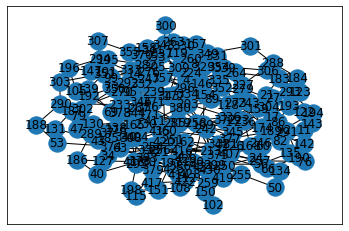

In [ ]:
nx.draw_networkx(G)

In [ ]:
u=[]
v=[]
for i in NAND_u:
  u.append(i)
for i in NAND_v:
  v.append(i)


In [ ]:
for i in AND_u:
  u.append(i)
for i in AND_v:
  v.append(i)


In [ ]:
for i in XOR_u:
  u.append(i)
for i in XOR_v:
  v.append(i)


In [ ]:
for i in NOR_u:
  u.append(i)
for i in NOR_v:
  v.append(i)


In [ ]:
for i in Not_u:
  u.append(i)
for i in Not_v:
  v.append(i)


In [ ]:
gx=dgl.graph((u,v))

In [ ]:
gx

Graph(num_nodes=433, num_edges=336,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
gxx=gx.to_networkx()

In [ ]:
gxx.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
def find_Number_of_NAND(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['type']=='NAND':
        to=to+1
  return to


In [ ]:
def find_Number_of_AND(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['type']=='AND':
        to=to+1
  return to


In [ ]:
def find_Number_of_Not(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['type']=='NOT':
        to=to+1
  return to


In [ ]:
def find_Number_of_XOR(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['type']=='XOR':
        to=to+1
  return to


In [ ]:
def find_Number_of_NOR(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['type']=='NOR':
        to=to+1
  return to


In [ ]:
def find_Number_of_PI(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['primary']=='PI': 
        to=to+1
  return to


In [ ]:
def find_Number_of_PO(node_num):
  to=0
  nei_list=[n for n in G.neighbors(node_num)]
  print(nei_list)
  for node in G.nodes(data=True):
    if node[0] in nei_list:
      if node[1]['primary']=='PO':
        to=to+1
  return to


In [ ]:
for node in G.nodes(data=True):
  print(f"Node{node[0]}:Features:{node[1]}")

Node1:Features:{'type': 'N', 'primary': 'PI'}
Node4:Features:{'type': 'N', 'primary': 'PI'}
Node8:Features:{'type': 'N', 'primary': 'PI'}
Node11:Features:{'type': 'N', 'primary': 'PI'}
Node14:Features:{'type': 'N', 'primary': 'PI'}
Node17:Features:{'type': 'N', 'primary': 'PI'}
Node21:Features:{'type': 'N', 'primary': 'PI'}
Node24:Features:{'type': 'N', 'primary': 'PI'}
Node27:Features:{'type': 'N', 'primary': 'PI'}
Node30:Features:{'type': 'N', 'primary': 'PI'}
Node34:Features:{'type': 'N', 'primary': 'PI'}
Node37:Features:{'type': 'N', 'primary': 'PI'}
Node40:Features:{'type': 'N', 'primary': 'PI'}
Node43:Features:{'type': 'N', 'primary': 'PI'}
Node47:Features:{'type': 'N', 'primary': 'PI'}
Node50:Features:{'type': 'N', 'primary': 'PI'}
Node53:Features:{'type': 'N', 'primary': 'PI'}
Node56:Features:{'type': 'N', 'primary': 'PI'}
Node60:Features:{'type': 'N', 'primary': 'PI'}
Node63:Features:{'type': 'N', 'primary': 'PI'}
Node66:Features:{'type': 'N', 'primary': 'PI'}
Node69:Features:

In [ ]:
find_Number_of_PI(4)

[154, 380, 119]


0

In [ ]:
IN=[]
OUT=[]
for node in G.nodes():
  IN.append(gx.in_degrees(node))
  OUT.append(gx.out_degrees(node))
  


In [ ]:
PI=[]
PO=[]
NAND=[]
AND=[]
XOR=[]
NOR=[]
Not=[]
for node in G.nodes():
  PI.append(find_Number_of_PI(node))
  PO.append(find_Number_of_PO(node))
  NAND.append(find_Number_of_NAND(node))
  AND.append(find_Number_of_AND(node))
  NOR.append(find_Number_of_NOR(node))
  XOR.append(find_Number_of_XOR(node))
  Not.append(find_Number_of_Not(node))
  

[242, 118]
[242, 118]
[242, 118]
[242, 118]
[242, 118]
[242, 118]
[242, 118]
[154, 380, 119]
[154, 380, 119]
[154, 380, 119]
[154, 380, 119]
[154, 380, 119]
[154, 380, 119]
[154, 380, 119]
[334, 157]
[334, 157]
[334, 157]
[334, 157]
[334, 157]
[334, 157]
[334, 157]
[246, 122]
[246, 122]
[246, 122]
[246, 122]
[246, 122]
[246, 122]
[246, 122]
[371, 158]
[371, 158]
[371, 158]
[371, 158]
[371, 158]
[371, 158]
[371, 158]
[159, 381, 123]
[159, 381, 123]
[159, 381, 123]
[159, 381, 123]
[159, 381, 123]
[159, 381, 123]
[159, 381, 123]
[336, 183]
[336, 183]
[336, 183]
[336, 183]
[336, 183]
[336, 183]
[336, 183]
[250, 126]
[250, 126]
[250, 126]
[250, 126]
[250, 126]
[250, 126]
[250, 126]
[372, 184]
[372, 184]
[372, 184]
[372, 184]
[372, 184]
[372, 184]
[372, 184]
[162, 386, 127]
[162, 386, 127]
[162, 386, 127]
[162, 386, 127]
[162, 386, 127]
[162, 386, 127]
[162, 386, 127]
[338, 185]
[338, 185]
[338, 185]
[338, 185]
[338, 185]
[338, 185]
[338, 185]
[254, 130]
[254, 130]
[254, 130]
[254, 130]
[254

In [ ]:
feature_metrix=[PI,PO,NAND,IN,OUT]

In [ ]:
len(feature_metrix[4])

196

In [ ]:
len(u)

336